
                                                     Upliance.ai Assignment

First, we have to upload all the necessary libraries, and after that, we have to load the dataset.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Data Analyst Intern Assignment - Excel.xlsx'
df_user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
df_cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
df_order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')


#Data Cleaning

Now, we have to clean the dataset and find the anomalies in it. First, we will start by cleaning the dataset column names, such as converting "User ID" to "User_ID," so that we can comfortably use all the columns.

In [3]:
df_user_details.columns = df_user_details.columns.str.strip().str.replace(" ", "_")
df_cooking_sessions.columns = df_cooking_sessions.columns.str.strip().str.replace(" ", "_")
df_order_details.columns = df_order_details.columns.str.strip().str.replace(" ", "_")


def check_missing(df, name):
    print(f"Missing values in {name}:\n{df.isnull().sum()}\n")

check_missing(df_user_details, "UserDetails")
check_missing(df_cooking_sessions, "CookingSessions")
check_missing(df_order_details, "OrderDetails")


Missing values in UserDetails:
User_ID              0
User_Name            0
Age                  0
Location             0
Registration_Date    0
Phone                0
Email                0
Favorite_Meal        0
Total_Orders         0
dtype: int64

Missing values in CookingSessions:
Session_ID         0
User_ID            0
Dish_Name          0
Meal_Type          0
Session_Start      0
Session_End        0
Duration_(mins)    0
Session_Rating     0
dtype: int64

Missing values in OrderDetails:
Order_ID        0
User_ID         0
Order_Date      0
Meal_Type       0
Dish_Name       0
Order_Status    0
Amount_(USD)    0
Time_of_Day     0
Rating          2
Session_ID      0
dtype: int64



#Filling of  Missing Value

Now, after completing the data cleaning process, we need to fill the missing values. Observing the dataset, we notice that the missing values are minimal. Therefore, I will use the median value of Age and Rating to fill them.

In [4]:
df_user_details['Age'] = df_user_details['Age'].fillna(df_user_details['Age'].median())
df_order_details['Rating'] = df_order_details['Rating'].fillna(df_order_details['Rating'].median())

#Dublicate Finding and Removal

Now, we need to find duplicates in the dataset across all three sheets and remove them. Although this can be done in Excel by creating a table, I prefer solving it using Python.

In [7]:
df_user_details.drop_duplicates(inplace=True)
df_cooking_sessions.drop_duplicates(inplace=True)
df_order_details.drop_duplicates(inplace=True)


print(df_user_details.columns)
print(df_cooking_sessions.columns)
print(df_order_details.columns)

Index(['User_ID', 'User_Name', 'Age', 'Location', 'Registration_Date', 'Phone',
       'Email', 'Favorite_Meal', 'Total_Orders'],
      dtype='object')
Index(['Session_ID', 'User_ID', 'Dish_Name', 'Meal_Type', 'Session_Start',
       'Session_End', 'Duration_(mins)', 'Session_Rating'],
      dtype='object')
Index(['Order_ID', 'User_ID', 'Order_Date', 'Meal_Type', 'Dish_Name',
       'Order_Status', 'Amount_(USD)', 'Time_of_Day', 'Rating', 'Session_ID'],
      dtype='object')


#Merge Datasets (Order_details , Cooking_sessions, User_details)

Now, we have three sheets. After completing all the cleaning, filling of missing values, and duplicate removal, we are ready to merge all three tables. Since all the tables have User_ID as a foreign key, we will use User_ID to connect them.

In [10]:
merged_df = df_cooking_sessions.merge(df_order_details, on='User_ID', how='inner')
merged_df = merged_df.merge(df_user_details, on='User_ID', how='inner')
print(merged_df.head())


  Session_ID_x User_ID   Dish_Name_x Meal_Type_x       Session_Start  \
0         S001    U001     Spaghetti      Dinner 2024-12-01 19:00:00   
1         S001    U001     Spaghetti      Dinner 2024-12-01 19:00:00   
2         S001    U001     Spaghetti      Dinner 2024-12-01 19:00:00   
3         S002    U002  Caesar Salad       Lunch 2024-12-01 12:00:00   
4         S002    U002  Caesar Salad       Lunch 2024-12-01 12:00:00   

          Session_End  Duration_(mins)  Session_Rating  Order_ID Order_Date  \
0 2024-12-01 19:30:00               30             4.5      1001 2024-12-01   
1 2024-12-01 19:30:00               30             4.5      1004 2024-12-02   
2 2024-12-01 19:30:00               30             4.5      1009 2024-12-05   
3 2024-12-01 12:20:00               20             4.0      1002 2024-12-01   
4 2024-12-01 12:20:00               20             4.0      1006 2024-12-03   

   ... Rating Session_ID_y      User_Name  Age     Location  \
0  ...    5.0         S001  A

#Data Analysis Process

Finally we reached the stage where we have to see the relationship between different factor like Cooking Sessions and Orders etc..


In below the finding of **Relationship between Cooking Sessions and  Orders**

In [14]:
cooking_order_relation = merged_df.groupby('User_ID').agg(
    total_sessions=('Session_ID_x', 'nunique'),
    total_orders=('Order_ID', 'nunique')
).reset_index()
print("Relationship between Cooking Sessions and Orders:\n", cooking_order_relation)


Relationship between Cooking Sessions and Orders:
   User_ID  total_sessions  total_orders
0    U001               3             3
1    U002               3             3
2    U003               3             3
3    U004               2             2
4    U005               2             2
5    U006               1             1
6    U007               1             1
7    U008               1             1


**Popular Dishes**

In [15]:
popular_dishes = merged_df['Dish_Name_x'].value_counts().reset_index()
popular_dishes.columns = ['Dish_Name', 'Count']
print("Popular Dishes:\n", popular_dishes.head(10))


Popular Dishes:
          Dish_Name  Count
0        Spaghetti      9
1  Grilled Chicken      9
2     Caesar Salad      7
3         Pancakes      6
4    Veggie Burger      4
5          Oatmeal      3


*Demographic Analysis between Age and Order*

In [16]:
age_order_relation = merged_df.groupby('Age').agg(total_orders=('Order_ID', 'nunique')).reset_index()
print("Age vs. Total Orders:\n", age_order_relation)


Age vs. Total Orders:
    Age  total_orders
0   25             1
1   27             2
2   28             3
3   30             2
4   31             1
5   35             3
6   38             1
7   42             3


**Demographic Analysis (Age, Location, Favorite Meal vs Orders)**

In [17]:
age_location_meal_relation = merged_df.groupby(['Age', 'Location', 'Favorite_Meal']).agg(
    total_orders=('Order_ID', 'nunique'),
    total_sessions=('Session_ID_x', 'nunique'),
    average_rating=('Rating', 'mean')
).reset_index()
print("Demographic Analysis (Age, Location, Favorite Meal):\n", age_location_meal_relation.head(10))


Demographic Analysis (Age, Location, Favorite Meal):
    Age       Location Favorite_Meal  total_orders  total_sessions  \
0   25         Austin        Dinner             1               1   
1   27  San Francisco        Dinner             2               2   
2   28       New York        Dinner             3               3   
3   30        Seattle         Lunch             2               2   
4   31          Miami        Dinner             1               1   
5   35    Los Angeles         Lunch             3               3   
6   38         Boston     Breakfast             1               1   
7   42        Chicago     Breakfast             3               3   

   average_rating  
0        5.000000  
1        4.000000  
2        4.666667  
3        4.000000  
4        4.000000  
5        4.000000  
6        5.000000  
7        4.000000  


**Relationship Between Time of Day and Orders**

In [18]:
time_order_relation = merged_df.groupby('Time_of_Day').agg(total_orders=('Order_ID', 'nunique')).reset_index()
print("Time of Day vs. Total Orders:\n", time_order_relation)


Time of Day vs. Total Orders:
   Time_of_Day  total_orders
0         Day             5
1     Morning             3
2       Night             8


**Relationship Between Session Ratings and Orders**

In [19]:
rating_order_relation = merged_df.groupby('Session_Rating').agg(total_orders=('Order_ID', 'nunique')).reset_index()
print("Session Ratings vs. Total Orders:\n", rating_order_relation)


Session Ratings vs. Total Orders:
     Session_Rating  total_orders
0              4.0             3
1              4.1             3
2              4.2             3
3              4.3             4
4              4.4             5
5              4.5             3
6              4.6             5
7              4.7             2
8              4.8             4
9              4.9             3
10             5.0             1


# Data Visualization

Now, we are nearing the final step of this assignment, where we need to visualize all the data using graphs.

So we begin our Visualization with **Popular Dishes**

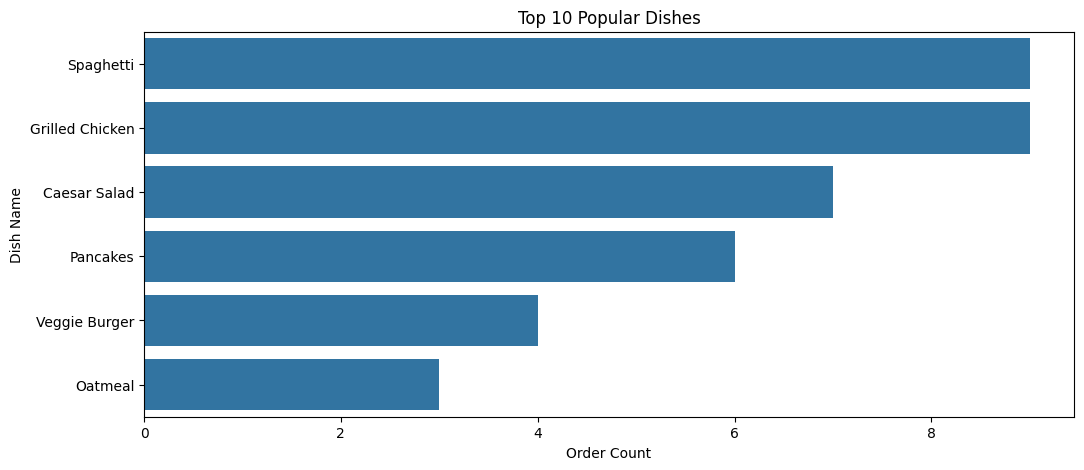

In [27]:
plt.figure(figsize=(12, 5))
sns.barplot(data=popular_dishes.head(10), x='Count', y='Dish_Name')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Order Count')
plt.ylabel('Dish Name')
plt.show()

**Demographic Analysis**

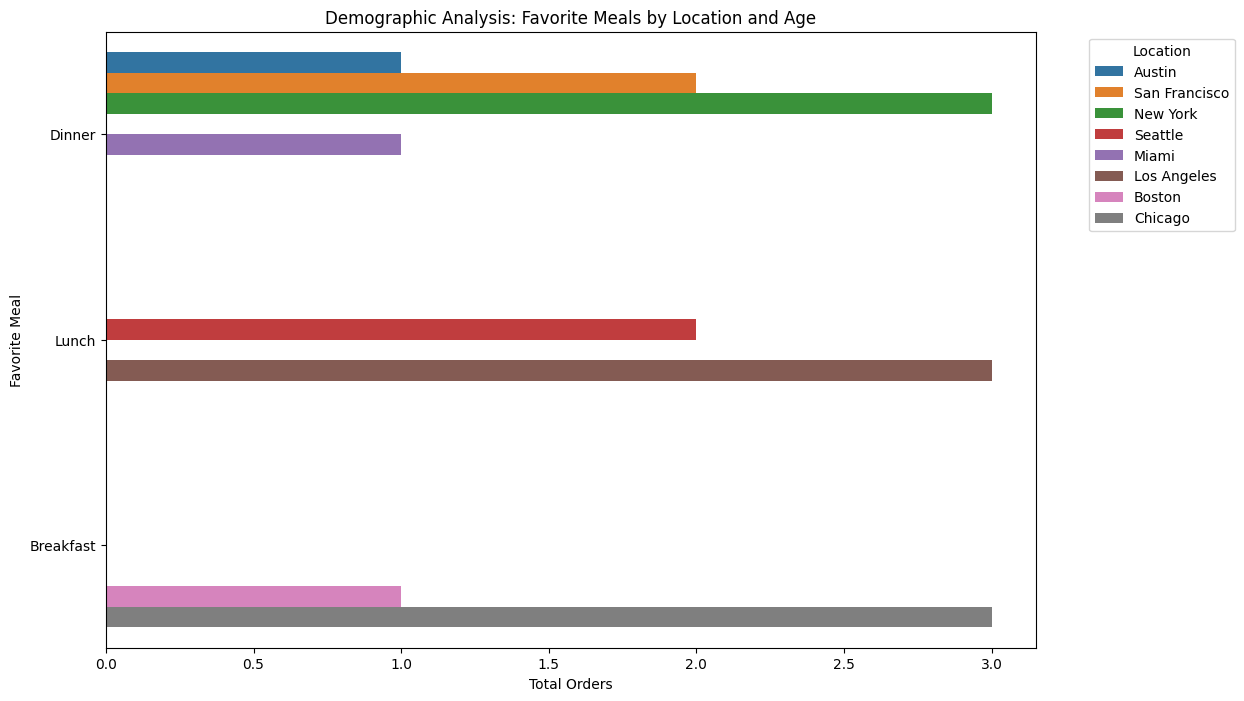

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(data=age_location_meal_relation.head(20), x='total_orders', y='Favorite_Meal', hue='Location')
plt.title('Demographic Analysis: Favorite Meals by Location and Age')
plt.xlabel('Total Orders')
plt.ylabel('Favorite Meal')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Orders vs Cooking Sessions**

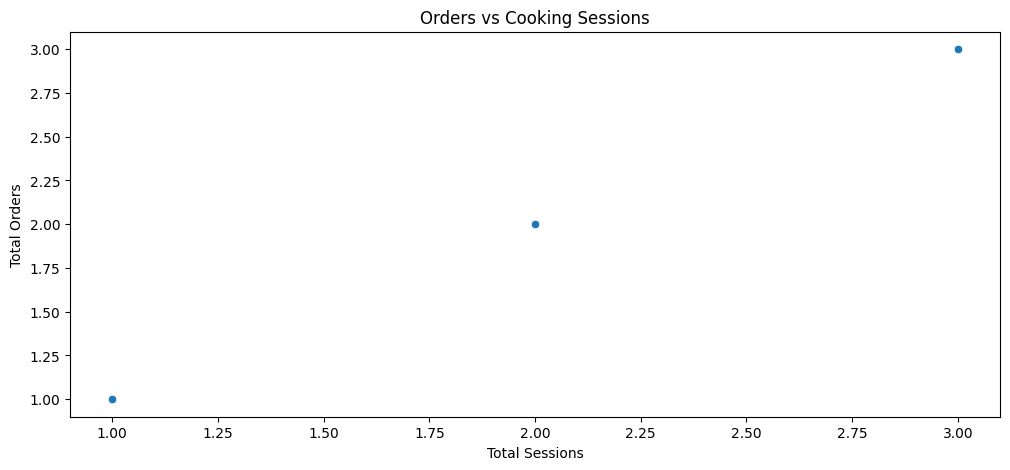

In [26]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=cooking_order_relation, x='total_sessions', y='total_orders')
plt.title('Orders vs Cooking Sessions')
plt.xlabel('Total Sessions')
plt.ylabel('Total Orders')
plt.show()


**Time of Day vs. Orders**

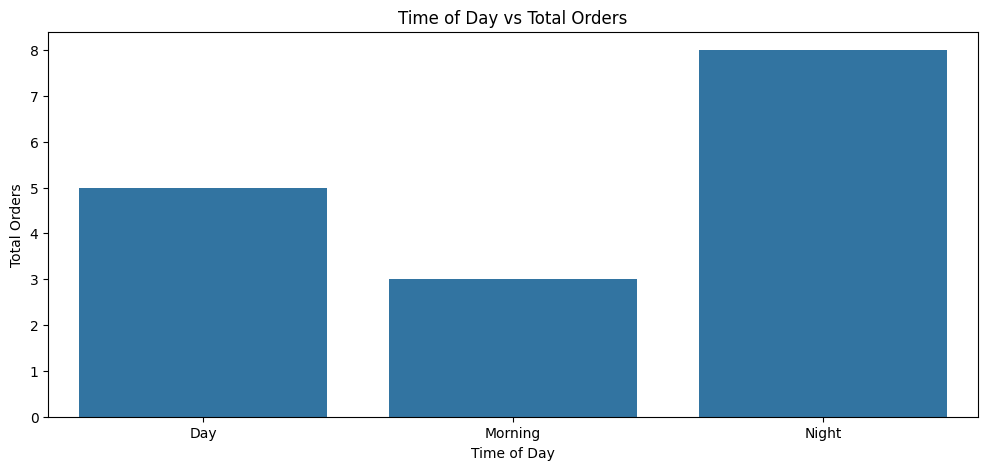

In [25]:
plt.figure(figsize=(12, 5))
sns.barplot(data=time_order_relation, x='Time_of_Day', y='total_orders')
plt.title('Time of Day vs Total Orders')
plt.xlabel('Time of Day')
plt.ylabel('Total Orders')
plt.show()

**Session Ratings vs Orders**

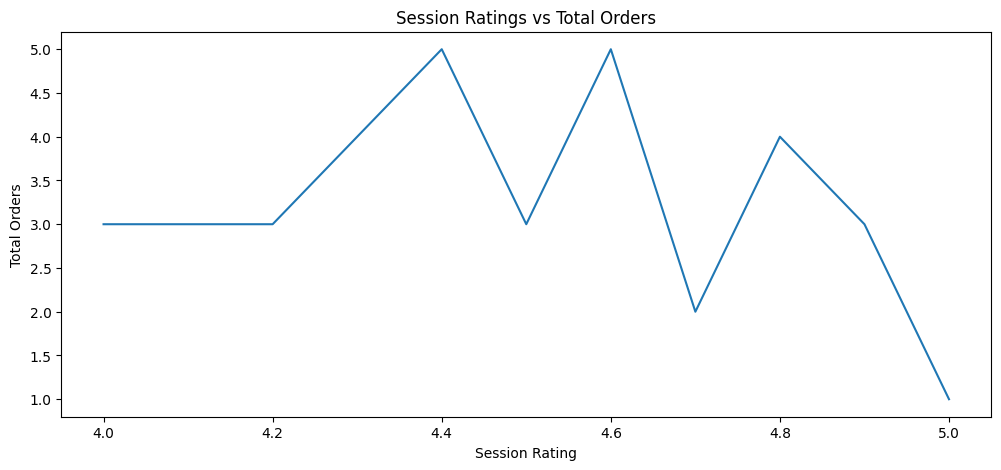

In [29]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=rating_order_relation, x='Session_Rating', y='total_orders')
plt.title('Session Ratings vs Total Orders')
plt.xlabel('Session Rating')
plt.ylabel('Total Orders')
plt.show()

#Predictive Analysis

In this daset we can be applied to this data to forecast future trends

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Feature Engineering: Aggregating data for predictive modeling
predictive_data = merged_df.groupby('User_ID').agg(
    total_sessions=('Session_ID_x', 'nunique'),
    avg_rating=('Rating', 'mean'),
    total_orders=('Order_ID', 'nunique'),
    avg_duration=('Duration_(mins)', 'mean'),
).reset_index()

# Features and target variable
X = predictive_data[['total_sessions', 'avg_rating', 'avg_duration']]
y = predictive_data['total_orders']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Display feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("Feature Importance:\n", coefficients)


Mean Absolute Error: 1.1102230246251565e-16
Mean Squared Error: 2.465190328815662e-32
R² Score: 1.0
Feature Importance:
           Feature   Coefficient
0  total_sessions  1.000000e+00
1      avg_rating -3.244248e-16
2    avg_duration  2.128855e-17


Linear Regression:
Mean Absolute Error: 2.220446049250313e-16
Mean Squared Error: 9.860761315262648e-32
R² Score: 1.0

Ridge Regression:
Mean Absolute Error: 0.2339505710073222
Mean Squared Error: 0.054823043011028624
R² Score: 0.9451769569889714

Lasso Regression:
Mean Absolute Error: 0.014999999999999902
Mean Squared Error: 0.00022499999999999707
R² Score: 0.999775

Random Forest Regression:
Mean Absolute Error: 0.61
Mean Squared Error: 0.3737
R² Score: 0.6263000000000001

Random Forest Feature Importance:
           Feature  Importance
0  total_sessions    0.645612
3             Age    0.186223
2    avg_duration    0.110891
1      avg_rating    0.057274

Ridge Regression Cross-Validation:
R² scores: [0.         0.86885455 0.96730463        nan        nan]
Mean R²: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


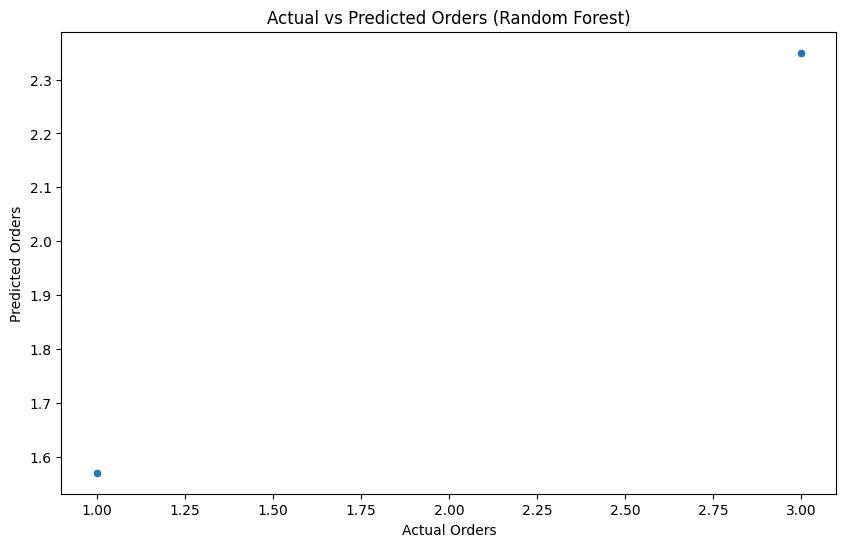

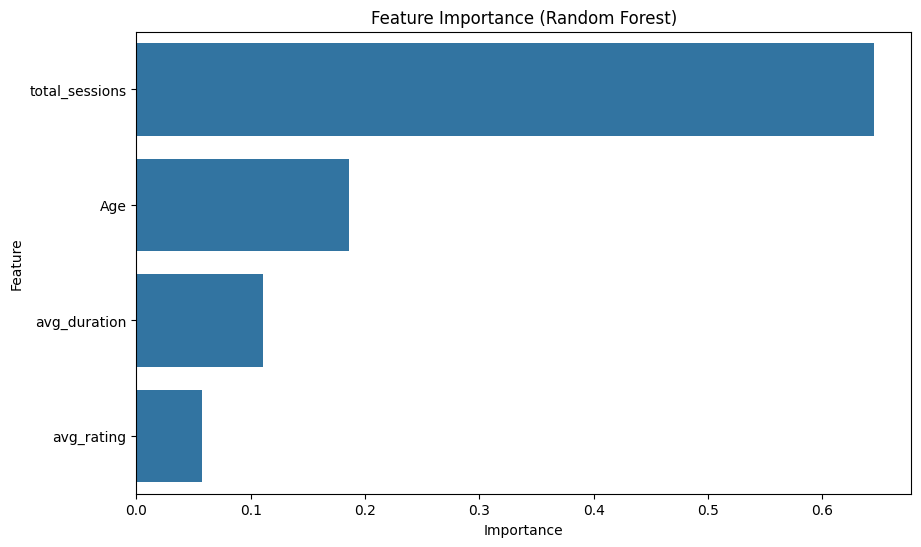

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


predictive_data = merged_df.groupby('User_ID').agg(
    total_sessions=('Session_ID_x', 'nunique'),
    avg_rating=('Rating', 'mean'),
    total_orders=('Order_ID', 'nunique'),
    avg_duration=('Duration_(mins)', 'mean'),
    Age=('Age', 'mean'),
).reset_index()

X = predictive_data[['total_sessions', 'avg_rating', 'avg_duration', 'Age']]
y = predictive_data['total_orders']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\nRidge Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))



lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))



rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))



feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:\n", feature_importances)
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print("\nRidge Regression Cross-Validation:")
print("R² scores:", ridge_cv_scores)
print("Mean R²:", ridge_cv_scores.mean())



plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Actual vs Predicted Orders (Random Forest)')
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')
plt.show()



plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
